# Wind and Solar Energy Production

Wind & Solar Energy Production Dataset contains hourly wind and solar generation data from France spanning January 2020 to November 2025, featuring 51,864 complete records with 9 key columns.

It includes temporal features (date, hours, day-of-year, day name, month, season) and source classification (Wind, Solar, Mixed), with total production ranging from 58 to 23,446 MWh per hour and wind dominating at 81.9% of records.

This comprehensive dataset supports advanced renewable energy forecasting through regression and time series models, detailed pattern analysis of diurnal/seasonal/weekly trends, machine learning applications like classification and clustering, anomaly detection for production outliers, and statistical trend evaluation.

The dataset is available at the [link](https://www.kaggle.com/datasets/ahmeduzaki/wind-and-solar-energy-production-dataset/data?select=Energy+Production+Dataset.csv).

## Business question

Business question is centered around the production and what factor affect it. Considering the 
current dataset: 
* How production varies considering the seasons or the power source? 
* How production varied along the years, considering the month production? 

# 1. Loading the dataset

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
from IPython.display import clear_output

# Filepath to the dataset
file_path = "Energy Production Dataset.csv"

# Load the latest version
data = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "ahmeduzaki/wind-and-solar-energy-production-dataset",
  file_path,
)

clear_output()
print("Dataset loaded successfully!")


Dataset loaded successfully!


# 2. Data Exploration

In the data exploration phase the goal is to understand the structure of the data. We verify:
* Are there missing or extreme values?
* Are there any invalid data?
* Variable types
* Distribution and dispersion (statistical analysis and visualization)
* Frequency
* Discretization if applicable
* Impact of X on Y

In [2]:
df = data.copy()
df.columns

Index(['Date', 'Start_Hour', 'End_Hour', 'Source', 'Day_of_Year', 'Day_Name',
       'Month_Name', 'Season', 'Production'],
      dtype='str')

In [3]:
df.head()

,Date,Start_Hour,End_Hour,Source,Day_of_Year,Day_Name,Month_Name,Season,Production
0,11/30/2025,21,22,Wind,334,Sunday,November,Fall,5281
1,11/30/2025,18,19,Wind,334,Sunday,November,Fall,3824
2,11/30/2025,16,17,Wind,334,Sunday,November,Fall,3824
3,11/30/2025,23,0,Wind,334,Sunday,November,Fall,6120
4,11/30/2025,6,7,Wind,334,Sunday,November,Fall,4387


In [4]:
df.describe()

,Start_Hour,End_Hour,Day_of_Year,Production
count,51864.000000,51864.000000,51864.000000,51864.000000
mean,11.500000,11.500000,180.798415,6215.069933
std,6.922253,6.922253,104.291387,3978.364965
min,0.000000,0.000000,1.000000,58.000000
25%,5.750000,5.750000,91.000000,3111.000000
50%,11.500000,11.500000,181.000000,5372.000000
75%,17.250000,17.250000,271.000000,8501.000000
max,23.000000,23.000000,366.000000,23446.000000


In [5]:
df.duplicated().any()

np.False_

In [6]:
if (df.duplicated()).any():
    print("Found duplicated values!")
else:
    print("Did not find any duplicated values!")

Did not find any duplicated values!


In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 51864 entries, 0 to 51863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Date         51864 non-null  str  
 1   Start_Hour   51864 non-null  int64
 2   End_Hour     51864 non-null  int64
 3   Source       51864 non-null  str  
 4   Day_of_Year  51864 non-null  int64
 5   Day_Name     51864 non-null  str  
 6   Month_Name   51864 non-null  str  
 7   Season       51864 non-null  str  
 8   Production   51864 non-null  int64
dtypes: int64(4), str(5)
memory usage: 3.6 MB


There are no null values in the dataset.

## Analysis of Numerical data

### Analysis of "Date"

In [8]:
df.Date # mm-dd-yyyy
print("The current format is mm-dd-yyyy")

The current format is mm-dd-yyyy


In [9]:
# Convert string to Datetime
import pandas as pd
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 51864 entries, 0 to 51863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         51864 non-null  datetime64[us]
 1   Start_Hour   51864 non-null  int64         
 2   End_Hour     51864 non-null  int64         
 3   Source       51864 non-null  str           
 4   Day_of_Year  51864 non-null  int64         
 5   Day_Name     51864 non-null  str           
 6   Month_Name   51864 non-null  str           
 7   Season       51864 non-null  str           
 8   Production   51864 non-null  int64         
dtypes: datetime64[us](1), int64(4), str(4)
memory usage: 3.6 MB


In [10]:
year = df.Date.apply(lambda x: x.year)
print(year.min())
print(year.max())

df["year"] = year

2020
2025


The dataset contains information of the production for the years 2020 to 2025.

In [11]:
import numpy as np
month = df.Date.apply(lambda x: x.month)
print(np.sort(month.unique()))

df["month"] = month

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [12]:
df.groupby(["year"])["month"].unique()

year
2020    [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
2021    [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
2022    [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
2023    [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
2024    [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
2025        [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Name: month, dtype: object

From 2020 to 2024 we have measures of the production on all months of the year. The year 2025 we have measures from January to November, that is, no measurement in December.
The impact of that, is that we cannot perform an analysis of december's production from 2020 to 2025, only from 2020 to 2024.

(i.e. Missing value for december)


In [13]:
day = df.Date.apply(lambda x: x.day)
df["day"] = day

In [14]:
unique_days = df.groupby(["year", "month"])["day"].unique().reset_index()

In [15]:
unique_days.loc[2, "day"]

array([31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [16]:
unique_days[unique_days["month"] == 2].iloc[0]

year                                                  2020
month                                                    2
day      [29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 1...
Name: 1, dtype: object

In [17]:
# check missing days in the dataset: 
def check_missing_day(unique_days):
    all_months = list(range(1,13))
    n_days = [31,28,31,30,31,30,31,31,30,31,30,31]

    dict_days_by_month = dict(zip(all_months, n_days))
    leap_years = [2020, 2024]

    for month, days in dict_days_by_month.items():
        
        temp = unique_days[unique_days["month"] == month]
        if month == 2:
            leap = temp[unique_days["year"].isin(leap_years)]
            is_complete = leap["day"].map(lambda x: x.shape[0])==(days+1)
            if not is_complete.all():
                print(is_complete[is_complete==False].index())

        else:
            is_complete = temp["day"].map(lambda x: x.shape[0])==(days)
            if not is_complete.all():
                print(is_complete[is_complete==False].index())



In [18]:
check_missing_day(unique_days)

/var/folders/xm/3ksp3z452z1fgpzrq_nfylnm0000gp/T/ipykernel_23252/3970797402.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  leap = temp[unique_days["year"].isin(leap_years)]


### Verifying hours of the day

No missing values were found considering the days.

In [19]:
#Verifying if all days have 24 hours of measurements
measurements= df.groupby("Date")["Start_Hour"].unique()


In [20]:
# Hours without 24 hours of measurements
measurements = measurements.reset_index()
non_standard_measurements = measurements[measurements["Start_Hour"].map(lambda x: x.shape[0]!=24)]
non_standard_measurements

,Date,Start_Hour
88,2020-03-29,"[15, 18, 11, 4, 21, 22, 0, 12, 9, 13, 3, 1, 20..."
452,2021-03-28,"[15, 23, 18, 1, 3, 14, 12, 8, 9, 20, 17, 4, 5,..."
816,2022-03-27,"[19, 20, 17, 18, 16, 10, 4, 15, 11, 22, 5, 12,..."
1180,2023-03-26,"[9, 22, 17, 5, 14, 0, 20, 10, 6, 13, 16, 1, 11..."
1551,2024-03-31,"[21, 14, 15, 10, 1, 18, 0, 16, 4, 12, 5, 19, 2..."
1915,2025-03-30,"[9, 14, 3, 1, 17, 15, 11, 5, 4, 0, 13, 23, 21,..."


In [21]:
# How many hours of measurement in the day
non_standard_measurements["Start_Hour"].map(lambda x: x.shape[0])

88      23
452     23
816     23
1180    23
1551    23
1915    23
Name: Start_Hour, dtype: int64

### Repeated hours in the day

In [22]:
# example of repeated hours
measurements= df.groupby("Date")["Date"].value_counts()
non_standard_measurements = measurements[measurements >24]

In [23]:
day = non_standard_measurements.reset_index().iloc[0].Date
one_day = df[df.Date == day]
one_day.sort_values("Start_Hour")

,Date,Start_Hour,End_Hour,Source,Day_of_Year,Day_Name,Month_Name,Season,Production,year,month,day
44694,2020-10-25,0,1,Wind,299,Sunday,October,Fall,11467,2020,10,25
44693,2020-10-25,1,2,Wind,299,Sunday,October,Fall,11525,2020,10,25
44707,2020-10-25,2,3,Wind,299,Sunday,October,Fall,10696,2020,10,25
44698,2020-10-25,2,3,Wind,299,Sunday,October,Fall,11001,2020,10,25
44703,2020-10-25,3,4,Wind,299,Sunday,October,Fall,8774,2020,10,25
44705,2020-10-25,4,5,Wind,299,Sunday,October,Fall,8234,2020,10,25
44699,2020-10-25,5,6,Wind,299,Sunday,October,Fall,7800,2020,10,25
44691,2020-10-25,6,7,Wind,299,Sunday,October,Fall,8401,2020,10,25
44708,2020-10-25,7,8,Wind,299,Sunday,October,Fall,8284,2020,10,25
44702,2020-10-25,8,9,Wind,299,Sunday,October,Fall,8012,2020,10,25


Some days have more than 24 measurements.
The initial hypothesis was the data was duplicated, but upon checking with both the duplicate
method, and further investigation it is clear that it is not. The investigation of one of such
dates, revealed that the Production values diverge for the roles with same time period and same day.
The additional measurement is probably from another power plant. 

An important insight is that we do not have all measurements for all hours of the day in 
a small portion of the dataset.

The days that have an additional measurements that is not a duplicate of other day, might be from another power plant or being mislabeled.
Since we do not have information about the the power plant that produced the energy, we can't confirm
this hypothesis. Dropping the values may cause issues issues and we will focus our approach in
using the mean by month, to accommodate this particularity.  

### Conclusion of the Date column

- No missing values considering the days
- The December measurements on 2025 do not exist (they are missing).
- No invalid data was found.
- Recommendation to treat the Data column more easily: convert str to datetime.

Conclusion: The missing value for december/2025 limits the analysis of that month to 2020 to 2024.
Additionally, the discretization of the measurements during the day will probably limit our analysis,
due to missing measurement periods during the day, or additional measurements for the same hour.

## Production

In [58]:
summary = df.Production.describe()
summary["IQR"] = summary['75%'] - summary['25%']
summary["median"] = df.Production.median()
summary["skew"] = df.Production.skew()
summary["kurtosis"] = df.Production.kurtosis()

display(summary)

count       51864.000000
mean         6215.069933
std          3978.364965
min            58.000000
25%          3111.000000
50%          5372.000000
75%          8501.000000
max         23446.000000
IQR          5390.000000
median       5372.000000
skew            0.928561
kurtosis        0.469162
Name: Production, dtype: float64

In [25]:
# Skew
skew = summary["skew"]

if skew == 0:
    print("The distribution is perfectly symmetrical, resembling a normal distribution.")
elif skew>0:
    print("The distribution is positively skewed")
else:
    print("The distribution is negatively skewed")

# Kurtosis
kurtosis = summary["kurtosis"]

if kurtosis > 0:
    print("The distribution has a sharp peak and heavy tails (lots of outliers)")

elif kurtosis <0:
    print("The distribution is flat with thin tails.")
else:
    print("The distribution is a standard Normal Distribution (the classic bell curve)")


The distribution is positively skewed
The distribution has a sharp peak and heavy tails (lots of outliers)


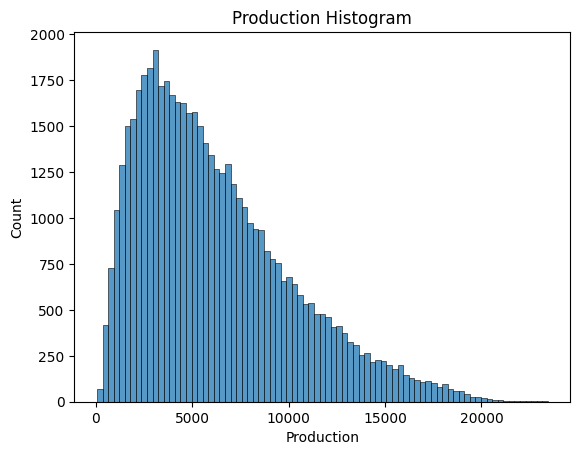

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt 


ax = sns.histplot(df.Production, bins="auto")
ax.set_title("Production Histogram")
plt.show()



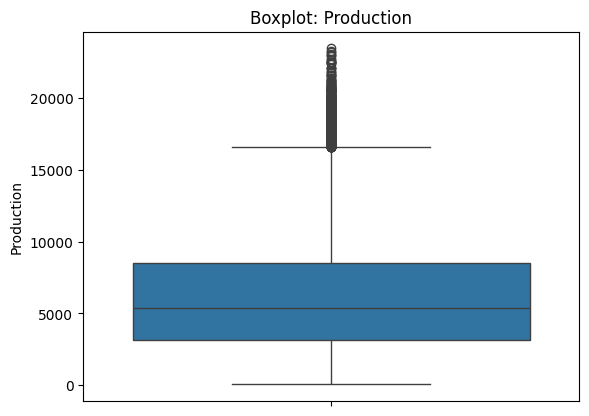

In [ ]:
sns.boxplot(df.Production)
plt.title(f"Boxplot: Production")
plt.show()


In [82]:
from IPython.display import Markdown

report = f"""

## Conclusion: Production

The Production variable contains {df.shape} complete observations (no missing values).
The average hourly production is approximately {round(summary["mean"],2)} units, with a standard deviation of {round(summary["std"],2)} units, indicating substantial variability in production levels (coefficient of variation ≈ {round(summary["std"]/summary["mean"],2)}).
The median production is {round(summary["median"],2)} units, which is lower than the mean, suggesting a right-skewed distribution influenced by high production peaks. The interquartile range (IQR) is {round(summary["IQR"],2)} units (from {round(summary["25%"],2)} to {round(summary["75%"],2)}),
meaning the middle 50% of observations fall within this range. The maximum observed production is {round(summary["max"],2)} units, which is considerably higher than the 75th percentile, indicating the presence of extreme but potentially plausible peak production events.
The skewness of the Production variable is {round(skew,2)}, confirming a moderate positive (right) skew. The kurtosis is {round(kurtosis,2)}, suggesting mildly heavier tails than a normal distribution and therefore a higher likelihood of extreme values.
Overall, most observations cluster around low-to-mid production values, while a smaller number of high-production periods extend the right tail. As a result, the mean is pulled upward by these extreme values and exceeds the median.
The histogram supports these findings by showing a concentration of observations at lower values and a long right tail, consistent with a right-skewed distribution. The boxplot also shows many high-end outliers, aligning with occasional peak production events.
If these high values are operationally plausible, it is best to retain them and investigate potential drivers (e.g., seasonality, demand spikes, shift effects, maintenance cycles, or process changes) rather than removing them by default.
"""
display(Markdown(report))




## Conclusion: Production

The Production variable contains (51864, 12) complete observations (no missing values).
The average hourly production is approximately 6215.07 units, with a standard deviation of 3978.36 units, indicating substantial variability in production levels (coefficient of variation ≈ 0.64).
The median production is 5372.0 units, which is lower than the mean, suggesting a right-skewed distribution influenced by high production peaks. The interquartile range (IQR) is 5390.0 units (from 3111.0 to 8501.0),
meaning the middle 50% of observations fall within this range. The maximum observed production is 23446.0 units, which is considerably higher than the 75th percentile, indicating the presence of extreme but potentially plausible peak production events.
The skewness of the Production variable is 0.93, confirming a moderate positive (right) skew. The kurtosis is 0.47, suggesting mildly heavier tails than a normal distribution and therefore a higher likelihood of extreme values.
Overall, most observations cluster around low-to-mid production values, while a smaller number of high-production periods extend the right tail. As a result, the mean is pulled upward by these extreme values and exceeds the median.
The histogram supports these findings by showing a concentration of observations at lower values and a long right tail, consistent with a right-skewed distribution. The boxplot also shows many high-end outliers, aligning with occasional peak production events.
If these high values are operationally plausible, it is best to retain them and investigate potential drivers (e.g., seasonality, demand spikes, shift effects, maintenance cycles, or process changes) rather than removing them by default.


# Analysis of the Categorical Data

In [27]:
categorical_data = df.select_dtypes(exclude="number")

In [28]:
print("Unique values:")
display(categorical_data.nunique())

Unique values:


Date          2161
Source           3
Day_Name         7
Month_Name      12
Season           4
dtype: int64

In [29]:
print("Data types:")
display(categorical_data.info())

Data types:
<class 'pandas.DataFrame'>
RangeIndex: 51864 entries, 0 to 51863
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        51864 non-null  datetime64[us]
 1   Source      51864 non-null  str           
 2   Day_Name    51864 non-null  str           
 3   Month_Name  51864 non-null  str           
 4   Season      51864 non-null  str           
dtypes: datetime64[us](1), str(4)
memory usage: 2.0 MB


None

### Days of the Week distribution (Day_Name)

In [30]:
frequency_table = categorical_data.Day_Name.value_counts().reset_index()
proportions_table = categorical_data.Day_Name.value_counts(normalize=True).reset_index()

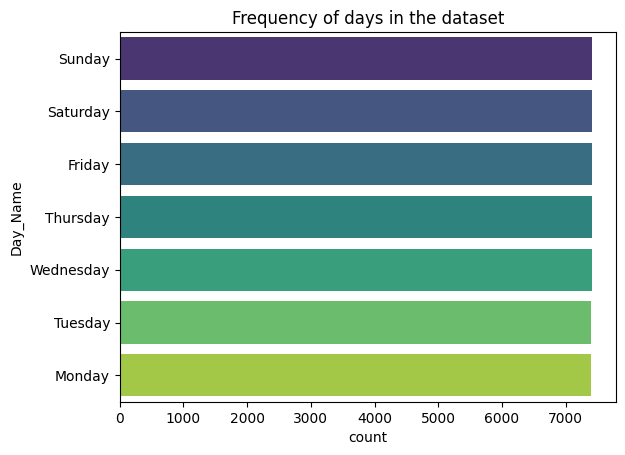

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt 


ax = sns.barplot(y="Day_Name", x = "count", data=frequency_table,palette='viridis', hue="Day_Name")
ax.set_title("Frequency of days in the dataset")
plt.show()

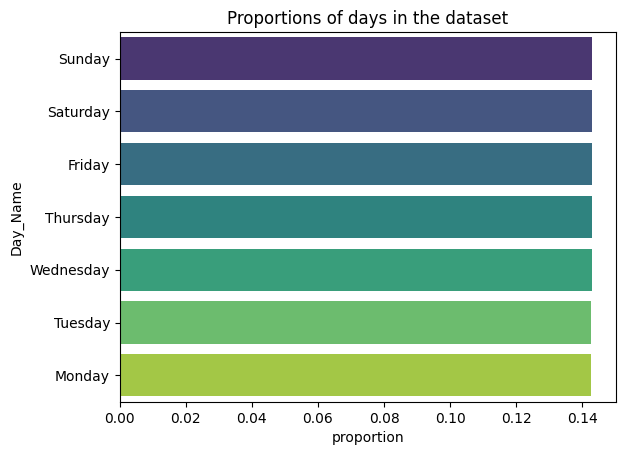

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt 


ax = sns.barplot(y="Day_Name", x = "proportion", data=proportions_table,palette='viridis', hue="Day_Name")
ax.set_title("Proportions of days in the dataset")
plt.show()

The distribution of datapoints by week days is balanced in the dataset.

## Months distribution (Month_Name)

In [33]:
frequency_table = categorical_data.Month_Name.value_counts().reset_index()
proportions_table = categorical_data.Month_Name.value_counts(normalize=True).reset_index()

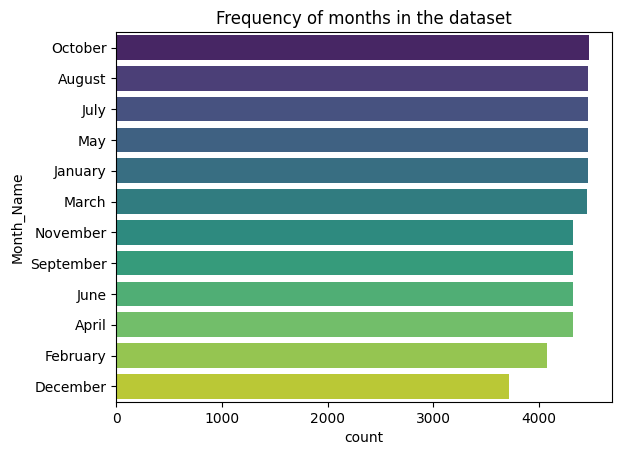

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt 


ax = sns.barplot(y="Month_Name", x = "count", data=frequency_table,palette='viridis', hue="Month_Name")
ax.set_title("Frequency of months in the dataset")
plt.show()

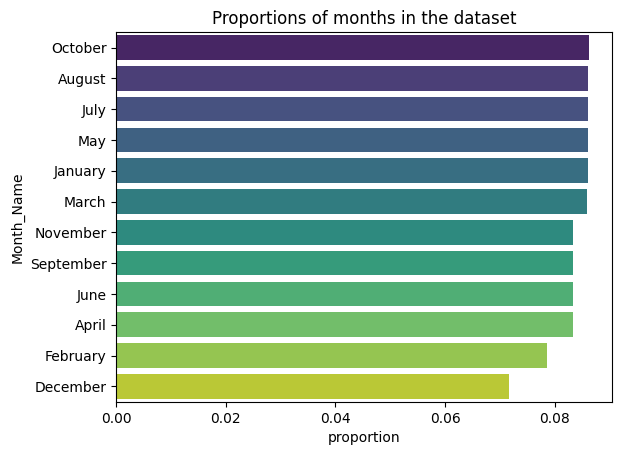

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt 


ax = sns.barplot(y="Month_Name", x = "proportion", data=proportions_table, palette='viridis', hue="Month_Name")
ax.set_title("Proportions of months in the dataset")
plt.show()

In [90]:
from IPython.display import Markdown


report = f"""
### Conclusion: Monthly Distribution

The dataset exhibits slight imbalances across months, primarily driven by **calendar variations** and temporal coverage gaps. 

**December** and **February** are the most notable underrepresented months: December due to the missing data for **2025**, and February due to its naturally shorter length. Similarly, months with **30 days** (e.g., April, June, September, November) show slightly lower proportions than 31-day months, reflecting the same impact of differing calendar lengths.
"""
display(Markdown(report))




### Conclusion: Monthly Distribution

The dataset exhibits slight imbalances across months, primarily driven by **calendar variations** and temporal coverage gaps. 

**December** and **February** are the most notable underrepresented months: December due to the missing data for **2025**, and February due to its naturally shorter length. Similarly, months with **30 days** (e.g., April, June, September, November) show slightly lower proportions than 31-day months, reflecting the same impact of differing calendar lengths.


The datapoints by months varies according to two factors: the length of the month, and the one month worth of missing data we already discovered when analyzing the Date column.
Even so, the dataset is fairly balanced. 

## Season

In [36]:
proportions_table = categorical_data.Season.value_counts(normalize=True).sort_values(ascending=True).reset_index()

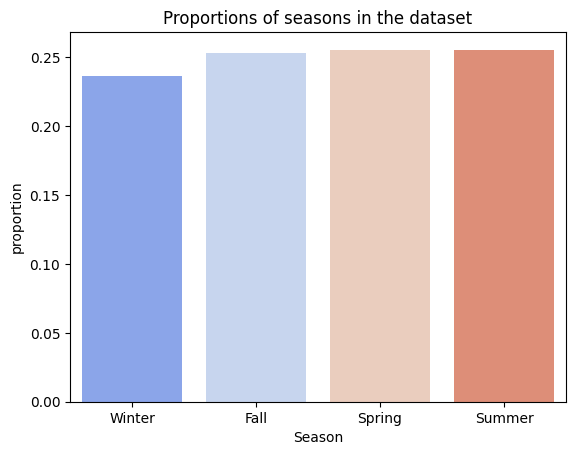

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt 


ax = sns.barplot(x="Season", y = "proportion", data=proportions_table, palette='coolwarm', hue="Season")
ax.set_title("Proportions of seasons in the dataset")
plt.show()

In [87]:
from IPython.display import Markdown


report = f"""
### Conclusion: Seasons

The dataset exhibits a slight imbalance across seasons, with **Winter** being underrepresented.
This discrepancy is likely due to temporal coverage gaps, specifically the absence of data for 
**December 2025**, combined with the naturally shorter duration of **February**.
"""
display(Markdown(report))



### Conclusion: Seasons

The dataset exhibits a slight imbalance across seasons, with **Winter** being underrepresented.
This discrepancy is likely due to temporal coverage gaps, specifically the absence of data for 
**December 2025**, combined with the naturally shorter duration of **February**.


## Type of energy source (Source)

In [72]:
frequency_table = categorical_data.Source.value_counts()
proportions_table = categorical_data.Source.value_counts(normalize=True)

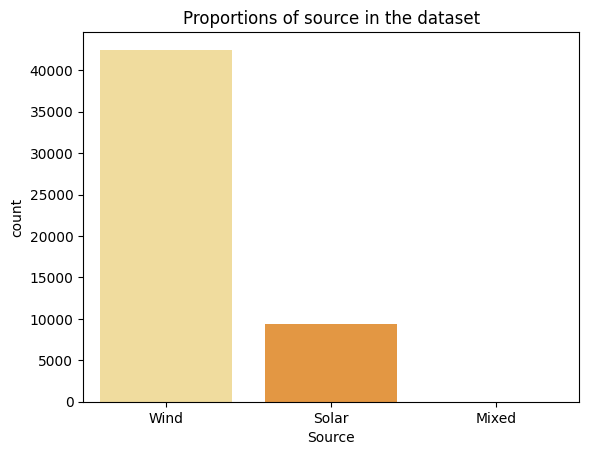

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt 


ax = sns.barplot(x="Source", y = "count", data=frequency_table.reset_index(), palette='YlOrBr', hue="Source")
ax.set_title("Proportions of source in the dataset")
plt.show()

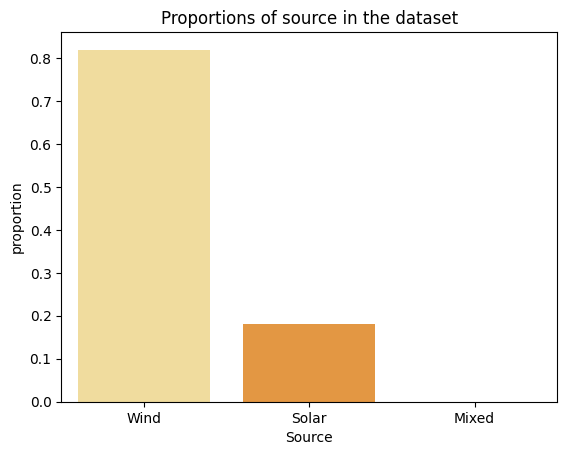

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt 


ax = sns.barplot(x="Source", y = "proportion", data=proportions_table.reset_index(), palette='YlOrBr', hue="Source")
ax.set_title("Proportions of source in the dataset")
plt.show()

In [83]:
proportions_table

Source
Wind     0.819142
Solar    0.180819
Mixed    0.000039
Name: proportion, dtype: float64

In [84]:
from IPython.display import Markdown


report = f"""
### Conclusion: Sources

The dataset exhibits a significant imbalance in energy sources.
**Wind** is the predominant source, accounting for **{proportions_table.Wind:.1%}** of the data,
while **Solar** comprises **{proportions_table.Solar:.1%}**. The **Mixed** category is statistically 
negligible, represented by only 2 observations.
"""
display(Markdown(report))


### Conclusion: Sources

The dataset exhibits a significant imbalance in energy sources.
**Wind** is the predominant source, accounting for **81.9%** of the data,
while **Solar** comprises **18.1%**. The **Mixed** category is statistically 
negligible, represented by only 2 observations.
